In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('../../data/housing-data.csv');
m = len(df)

In [27]:
x_mean = np.mean(df.LotArea)
y_mean = np.mean(df.SalePrice)
x_sd = df.LotArea.std()
y_sd = df.SalePrice.std()
print(f'Observations : {m}, xMean : {x_mean}, yMean: {y_mean}, XStdDev : {x_sd}, yStdDev : {y_sd}')

Observations : 1460, xMean : 10516.828082191782, yMean: 180921.19589041095, XStdDev : 9981.264932379147, yStdDev : 79442.50288288663


In [33]:
df.describe() 

,LotArea,SalePrice,xZscore,yZscore
count,1460.000000,1460.000000,1.460000e+03,1.460000e+03
mean,10516.828082,180921.195890,7.585257e-17,-1.190828e-15
std,9981.264932,79442.502883,1.000000e+00,7.959162e+00
min,1300.000000,34900.000000,-2.051125e+01,-5.751564e+01
25%,7553.500000,129975.000000,-1.086708e-01,-3.314089e+00
50%,9478.500000,163000.000000,1.040277e-01,1.795483e+00
75%,11601.500000,214000.000000,2.968890e-01,5.104182e+00
max,215245.000000,755000.000000,9.234128e-01,1.462953e+01


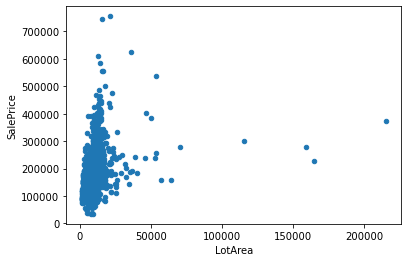

In [18]:
df.plot(x='LotArea', y='SalePrice',kind='scatter');

In [56]:
df['xZscore']= (x_mean - df.LotArea)/x_sd
df['yZscore']= (y_mean - df.SalePrice)/y_sd
cor_coff = (df.xZscore * df.yZscore).sum()/m
slope_m = cor_coff * y_sd/x_sd
intercept_b = y_mean - slope_m*x_mean

In [58]:
df['Predicted'] =slope_m*df.LotArea+intercept_b

In [61]:
df

,LotArea,SalePrice,xZscore,yZscore,Predicted
0,8450,208500,0.207071,-0.347154,176583.887684
1,9600,181500,0.091855,-0.007286,178997.201341
2,11250,223500,-0.073455,-0.535970,182459.781805
3,9550,140000,0.096864,0.515105,178892.274660
4,14260,250000,-0.375020,-0.869545,188776.367986
...,...,...,...,...,...
1455,7917,175000,0.260471,0.074534,175465.369267
1456,13175,210000,-0.266316,-0.366036,186499.459014
1457,9042,266500,0.147760,-1.077242,177826.219584
1458,9717,142125,0.080133,0.488356,179242.729774


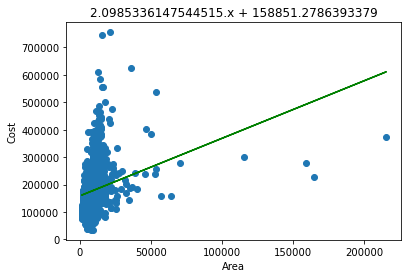

In [73]:
plt.scatter(df.LotArea, df.SalePrice)
plt.xlabel('Area')
plt.ylabel('Cost')
plt.title(f'{slope_m}.x + {intercept_b}')
plt.plot(df.LotArea, df.Predicted, color='g');

In [75]:
df.describe()

,LotArea,SalePrice,xZscore,yZscore,Predicted
count,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1460.000000
mean,10516.828082,180921.195890,7.585257e-17,-1.102999e-16,180921.195890
std,9981.264932,79442.502883,1.000000e+00,1.000000e+00,20946.019978
min,1300.000000,34900.000000,-2.051125e+01,-7.226343e+00,161579.372339
25%,7553.500000,129975.000000,-1.086708e-01,-4.163867e-01,174702.552298
50%,9478.500000,163000.000000,1.040277e-01,2.255870e-01,178742.229507
75%,11601.500000,214000.000000,2.968890e-01,6.412965e-01,183197.416371
max,215245.000000,755000.000000,9.234128e-01,1.838074e+00,610550.146547


In [93]:
intercept_b

158851.2786393379